In [23]:
from pathlib import Path
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import article

In [24]:
BR_DATA_DIR = Path('../../data/BirdsongRecognition/')
BR_TEST_DIRS = sorted(list(BR_DATA_DIR.glob('Bird*/')))

CONFIGS_DIR = Path('../../src/configs/')
BR_CONFIGS = sorted(list(CONFIGS_DIR.glob('*BirdsongRecognition*ini')))
BR_CONFIGS = [config for config in BR_CONFIGS if 'bird07' not in str(config)]

In [25]:
BR_DATA_DIR_HDLCU3 = Path('/media/bart/HD-LCU3/tweetynet_paper/BirdsongRecognition_copy_combined/')
BR_TEST_DIRS_HDLCU3 = sorted(list(BR_DATA_DIR_HDLCU3.glob('Bird*/learning_curve*/test/')))

In [30]:
br_df = article.util.make_df(BR_CONFIGS, BR_TEST_DIRS)

In [15]:
# make sure we are recovering accuracy array from dataframe
frame_err_arrs_from_data = {}
for bird_num, tweetynet_src, hdlcu3_src in zip(range(2, 10), BR_TEST_DIRS, BR_TEST_DIRS_HDLCU3):
    bird_ID = f'Bird{bird_num}'
    assert bird_ID in str(tweetynet_src)
    with open(tweetynet_src.joinpath('test_err'), 'rb') as f:
        test_err_tweetynet = pickle.load(f)
    with open(hdlcu3_src.joinpath('test_err'), 'rb') as f:
        test_err_hdlcu3 = pickle.load(f)
    assert np.array_equal(test_err_tweetynet, test_err_hdlcu3)
    frame_err_arrs_from_data[bird_ID] = test_err_hdlcu3
    
frame_err_arrs_from_df = {}
for animal_ID in frame_err_arrs_from_data.keys():
    df_this_animal = br_df[br_df.animal_ID == animal_ID]
    train_set_durs_this_animal = df_this_animal.train_set_dur.unique()
    frame_err_test = []
    for tsd_this in train_set_durs_this_animal:
        frame_err_test.append(df_this_animal[df_this_animal.train_set_dur == tsd_this].frame_error_test.to_numpy())
    frame_err_arrs_from_df[animal_ID] = frame_err_test

for k, v in frame_err_arrs_from_df.items():
    assert np.array_equal(v, frame_err_arrs_from_data[k])

AssertionError: 

In [28]:
train_set_durs = [60, 120, 480]
br_df_agg = article.util.agg_df(br_df, train_set_durs)

In [29]:
br_df_agg

,train_set_dur,frame_error_train_mean,frame_error_train_std,frame_error_test_mean,frame_error_test_std,syllable_error_train_mean,syllable_error_train_std,syllable_error_test_mean,syllable_error_test_std
animal_ID,,,,,,,,,
Bird2,60,0.000467,0.000299,0.042082,0.005043,0.002745,0.003171,0.274681,0.058363
Bird2,120,0.000758,0.000249,0.040385,0.009910,0.004698,0.005226,0.319106,0.112965
Bird2,480,0.000806,0.000105,0.025616,0.003138,0.011871,0.001706,0.192896,0.081747
Bird3,60,0.001133,0.000224,0.036863,0.001282,0.010433,0.006215,0.348915,0.062612
Bird3,120,0.001275,0.000171,0.031335,0.000916,0.010250,0.004153,0.249439,0.026456
Bird3,480,0.001616,0.000136,0.028098,0.001806,0.015964,0.003672,0.181376,0.030352
Bird4,60,0.003592,0.000990,0.045949,0.006207,0.019556,0.005718,0.282665,0.061640
Bird4,120,0.003771,0.000793,0.037273,0.001877,0.015314,0.007000,0.209719,0.034339
Bird4,480,0.003606,0.000456,0.033487,0.000771,0.025070,0.003899,0.210521,0.022534


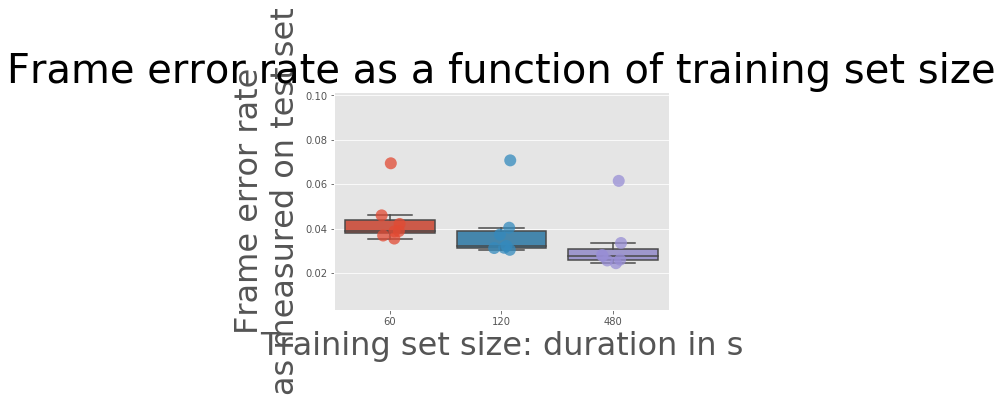

In [21]:
ax = article.plot.frame_error_test_mn_plot(br_df_agg)

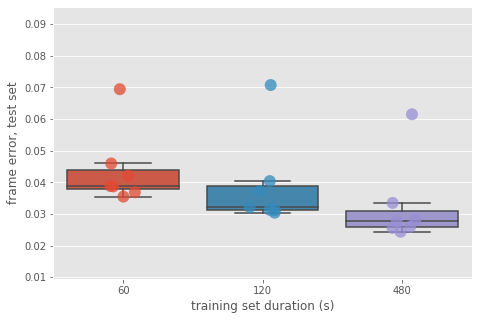

In [48]:
fig, ax = plt.subplots()
fig.set_size_inches(7.5,5)
ax = sns.stripplot(x="train_set_dur", y="frame_error_test_mean", data=br_df_agg, size=12, alpha=0.75)
sns.boxplot(x="train_set_dur", y="frame_error_test_mean", data=br_df_agg, ax=ax, showfliers=False)
ax.set_ylabel("frame error, test set")
ax.set_xlabel("training set duration (s)");
plt.savefig('br_frame_error.png')

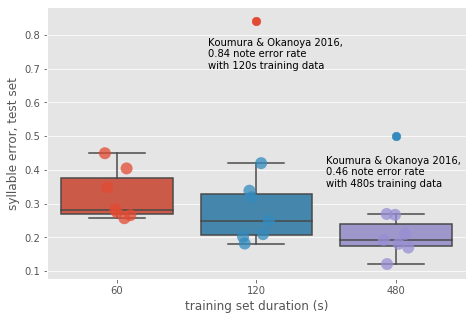

In [49]:
fig, ax = plt.subplots()
fig.set_size_inches(7.5,5)
sns.stripplot(x="train_set_dur", y="syllable_error_test_mean", data=br_df_agg, size=12, alpha=0.75, ax=ax)
sns.boxplot(x="train_set_dur", y="syllable_error_test_mean", data=br_df_agg, ax=ax, showfliers=False)
ax.set_ylabel("syllable error, test set")
ax.set_xlabel("training set duration (s)");
ax.scatter(1, 0.84, s=75)
ax.text(0.65, 0.7, 'Koumura & Okanoya 2016,\n0.84 note error rate\nwith 120s training data', fontsize=10)
ax.scatter(2, 0.5, s=75)
ax.text(1.5, 0.35, 'Koumura & Okanoya 2016,\n0.46 note error rate\nwith 480s training data', fontsize=10)
plt.savefig('br_syl_error.png')

In [27]:
br_df_stats_unstack = br_df_stats.unstack()

In [53]:
br_df_stats_unstack.stack().stack()

frame_error_test  frame_error_train  \
animal_ID train_set_dur                                             
Bird2     60            mean          0.042083           0.000467   
                        std           0.005046           0.000299   
          120           mean          0.040384           0.000758   
                        std           0.009909           0.000249   
          480           mean          0.025610           0.000807   
                        std           0.003140           0.000107   
Bird3     60            mean          0.036863           0.001133   
                        std           0.001282           0.000224   
          120           mean          0.031335           0.001275   
                        std           0.000916           0.000171   
          480           mean          0.028098           0.001616   
                        std           0.001806           0.000136   
Bird4     60            mean          0.045949           0.003592   
                        std           0.006207           0.000990   
          120           mean          0.037273           0.003771   
                        std           0.001877           0.000793   
          480           mean          0.033487           0.003606   
                        std           0.000771           0.000456   
Bird5     60            mean          0.038853           0.001650   
                        std           0.006253           0.000667   
          120           mean          0.030412           0.002950   
                        std           0.004032           0.001484   
          480           mean          0.024376           0.002061   
                        std           0.000639           0.000423   
Bird6     60            mean          0.035492           0.004900   
                        std           0.001881           0.001855   
          120           mean          0.032134           0.003296   
                        std           0.000672           0.000603   
          480           mean          0.027629           0.003060   
                        std           0.000364           0.000603   
Bird7     60            mean          0.069430           0.021117   
                        std           0.001987           0.004760   
          120           mean          0.070743           0.016504   
                        std           0.004249           0.002280   
          480           mean          0.061497           0.017043   
                        std           0.001110           0.000351   
Bird8     60            mean          0.038722           0.003575   
                        std           0.007377           0.001882   
          120           mean          0.031213           0.002608   
                        std           0.001527           0.000873   
          480           mean          0.025970           0.003306   
                        std           0.000871           0.000618   
Bird9     60            mean          0.038722           0.003575   
                        std           0.007377           0.001882   
          120           mean          0.031213           0.002608   
                        std           0.001527           0.000873   
          480           mean          0.025970           0.003306   
                        std           0.000871           0.000618   

                              syllable_error_test  syllable_error_train  
animal_ID train_set_dur                                                  
Bird2     60            mean             0.513612              0.002745  
                        std              0.005258              0.003171  
          120           mean             0.515472              0.004698  
                        std              0.005126              0.005226  
          480           mean             0.513612              0.011871  
                        std              0.005210            

In [51]:
df2.head()

                         train_set_dur  animal_ID
frame_error_train  mean  60             Bird2        0.000467
                                        Bird3        0.001133
                                        Bird4        0.003592
                                        Bird5        0.001650
                                        Bird6        0.004900
dtype: float64

In [42]:
sns.boxplot(x='train_set_dur', y='frame_error_train', data=br_df_stats_unstack)

ValueError: Could not interpret input 'train_set_dur'

In [21]:
sns.boxplot(x='train_set_dur', y='frame_error_test', hue='mean', data=br_df_stats)

ValueError: Could not interpret input 'train_set_dur'

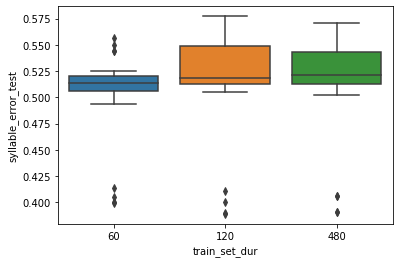

In [76]:
sns.boxplot(x='train_set_dur', y='syllable_error_test', data=br_df)

In [58]:
frame_err_arrs['Bird2']

array([[0.04435651, 0.03939695, 0.04794243, 0.03663521],
       [0.04521443, 0.02553042, 0.04583137, 0.04495898],
       [0.02524605, 0.02297111, 0.0241134 , 0.03010922]])